<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Convolutional Neural Networks for Image Classification

In [80]:
%config IPCompleter.greedy=True
# then click ". + tab "  simultaniously -> intellisense


#press [SHIFT] and [TAB] from within the method parentheses

### intellisense - works perfect!!
# pip3 install jupyter-tabnine
# jupyter nbextension install --py jupyter_tabnine
# jupyter nbextension enable --py jupyter_tabnine
# jupyter serverextension enable --py jupyter_tabnine

#--> I installed in (tensorflow_env) conda env.

In [81]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [82]:
# tf.debugging.set_log_device_placement(True)  #show GPU use

In [83]:
import pandas as pd
import numpy as np

In [84]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
x_train.shape

(60000, 28, 28)

In [87]:
single_image = x_train[0]

In [88]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [89]:
single_image.shape

(28, 28)

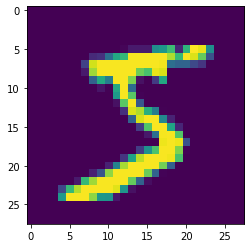

In [90]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [91]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [92]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [93]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### from tensorflow.keras.utils import to_categorical; to_categorical(y_train) - pd.get_dummies(y_train).values
* Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [94]:
from tensorflow.keras.utils import to_categorical

In [95]:
y_train.shape

(60000,)

In [96]:
y_example = to_categorical(y_train)

In [97]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [98]:
y_example.shape

(60000, 10)

In [99]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [100]:
y_cat_test = to_categorical(y_test,10) #automatically create 10 categories , but make sure, manually 10 

In [101]:
y_cat_train = to_categorical(y_train,10)

In [102]:
## option2 : instead of to_categorical(..), use pd.get_dummies(..)
#test pd.get_dummies(y_train)
print(pd.get_dummies(y_train).values.shape)
pd.get_dummies(y_train).values[:10] #df.values: change from df to np.array

(60000, 10)


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

In [103]:
np.equal(y_example, pd.get_dummies(y_train).values )[:10]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [104]:
np.all(np.equal(y_example, pd.get_dummies(y_train).values )) 

True

In [105]:
y_cat_test = pd.get_dummies(y_test).values

In [106]:
y_cat_train =  pd.get_dummies(y_train).values

In [107]:
y_cat_test = pd.get_dummies(y_test).values

### Processing X Data

We should normalize the X data

In [108]:
single_image.max()

255

In [109]:
single_image.min()

0

In [110]:
x_train = x_train/255
x_test = x_test/255

In [111]:
scaled_single = x_train[0]

In [112]:
scaled_single.shape

(28, 28)

In [113]:
scaled_single.max()

1.0

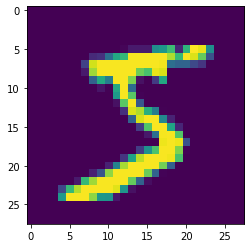

In [114]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [115]:
x_train.shape

(60000, 28, 28)

In [116]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [117]:
#batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [118]:
x_train.shape

(60000, 28, 28, 1)

In [119]:
x_test = x_test.reshape(10000,28,28,1)

In [120]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

### filters : complex data set, the larger, more varied,  more classes to classity (ex. type of road sign- stop, yield,left turn, right turn), the more filer we have.

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [122]:
# Conv2D() ####shift + Tab : for explanation
# Conv2D(
#     filters,
#     kernel_size,
#     strides=(1, 1),
#     padding='valid',
#     data_format=None,
#     dilation_rate=(1, 1),
#     activation=None,
#     use_bias=True,
#     kernel_initializer='glorot_uniform',
#     bias_initializer='zeros',
#     kernel_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     **kwargs,
# )

help(Conv2D)  #or shift + Tab : for explanation.
#large image size with small kernel_size(4,4) need to expand stride
#But this case, with small image size(28,28) with small kernel_size(4,4) -> stride(1,1) <- x, y (default is (1.1))

Help on class Conv2D in module tensorflow.python.keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x

In [123]:
## MaxPool2D
# MaxPool2D()
# MaxPool2D(
#     pool_size=(2, 2),  #half of kernel_size
#     strides=None,
#     padding='valid',
#     data_format=None,
#     **kwargs,
# )

# Channel, Filter, Kernel 
###  Channel : In practicality, most input images have 3 channels(RGB), and that number only increases the deeper you go into a network. It’s pretty easy to think of channels, in general, as being a “view” of the image as a whole, emphasising some aspects, de-emphasising others.[(Reference : Irhum Shafkat)](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
![channel1](channel1.jpeg)
* Most of the time, we deal with RGB images with three channels. [ (Photo by Andre Mouton) ](https://unsplash.com/photos/_d3sppFprWI) 

###  A filter: A collection of kernels, in case of multiple channels
![channel](channel.png)
*  whereas in the 1 channel case, where the term filter and kernel are interchangeable,

##  Each filter in a convolution layer produces one and only one output channel.
1. Each of the kernels of the filter “slides” over their respective input channels, producing a processed version of each. Some kernels may have stronger weights than others, to give more emphasis to certain input channels than others (eg. a filter may have a red kernel channel with stronger weights than others, and hence, respond more to differences in the red channel features than the others).
![output1](output1.gif)

2. Each of the per-channel processed versions are then summed together to form one channel. The kernels of a filter each produce one version of each channel, and the filter as a whole produces one overall output channel.
![output2](output2.gif)

3.  Finally, then there’s the bias term. The way the bias term works here is that each output filter has one bias term. The bias gets added to the output channel so far to produce the final output channel.
![output3](output3.gif)

In [124]:
28*28

784

###  This program will run a copy of your model on each GPU, splitting the input data between them,  also known as "data parallelism".

In [125]:
# strategy = tf.distribute.MirroredStrategy()
# with strategy.scope():
#     model = Sequential()

#     # CONVOLUTIONAL LAYER
#     model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',)) 
#     # POOLING LAYER
#     model.add(MaxPool2D(pool_size=(2, 2)))

#     # FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
#     model.add(Flatten())

#     # 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
#     model.add(Dense(128, activation='relu')) #power of 2, scale of 784-> 0 to 1000 -> 128 neurons

#     # LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
#     model.add(Dense(10, activation='softmax'))

#     # https://keras.io/metrics/
#     model.compile(loss='categorical_crossentropy',
#                   optimizer='adam',
#                   metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

## 2D(7x7) input matrix with 3 channels (RGB) - each filter consists of 3 kernels( A filter is a collection of 3 kernels)

### * Each filter actually happens to be a collection of kernels, with there being one kernel for every single input channel to the layer, and each kernel being unique.
#### * Whereas in the 1 channel case, where the term filter and kernel are interchangeable.
![filter](filter.png)

In [126]:
#fully connected layer 
28*28*16

12544

###  In case of standard fully connected layer
* 28×28=784 input features, weight matrix 25x(4x4)= 12544 ,which is kernel in cnn layer, and 4×4=16 output features
* We need weight matrix of 784×16 = <span style="color:red">12544 parameters</span>, with every output feature being the weighted sum of every single input feature.

# Convolution Layer — The Kernel
###  The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction.
### The Kernel shifts 9 times- convolution with same padding , zero padding with stride =1
![Image_convlovedFeature](kernel.gif)

Kernel/Filter, K = 
```
1  0  1
0  1  0
1  0  1
```
* Convoluting a 5x5x1 image with a 3x3x1 kernel to get a 3x3x1 convolved feature
* Image Dimensions = 5 (Height) x 5 (Breadth) x <span style="color:blue">1 (Number of channels, eg. RGB)</span>
In the above demonstration, the green section resembles our 5x5x1 input image, I. The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K, represented in the color yellow. We have selected K as a 3x3x1 matrix.
* The Kernel shifts 9 times because of Stride Length = 1 (Non-Strided), every time performing a matrix multiplication operation between K and the portion P of the image over which the kernel is hovering.

In [127]:
# first instance of 'input_img * feature_k = convolved_feature'
import numpy as np
input_img = np.array(
[[1, 1, 1],
 [0, 1, 1],
 [0, 0 ,1]]
)
feature_k = np.array(
[[1, 0, 1],
 [0, 1, 0],
 [1, 0, 1]]
)
sum(sum(input_img*feature_k)) #4

4

![cnn operation](cnnop.gif)
* Convolution operation on a MxNx3 image matrix with a 3x3x3(width, height, channel-depth) Kernel/Filter, K,
* In the case of images with <span style="color:blue">multiple channels (e.g. RGB)</span>, the Kernel has the same depth(3) as that of the input image. Matrix Multiplication is performed between Kn(Kernel) and In(Input) stack ([K1, I1]; [K2, I2]; [K3, I3]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output.

### The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. 
* ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. 
* With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would

# Padding :  
## Pad the edges with extra, “fake” pixels (usually of value 0, hence the oft-used term “zero padding”)
## The kernel when sliding can allow the original edge pixels to be at its center, while extending into the fake pixels beyond the edge, producing an output the same size as the input.
### 1. In case of without padding :  ( valid padding)- default in Conv2D

* Case1: Input(n,n): (6,6), Filter(f,f): (3,3), stride 1 => 4 by 4 matrix: (n-f+1) x (n-f+1)
![padding1](padding1.png) 
* So if you take this gray scale image.<span style="color:green">The pixel in the corner</span> will only get covers one time.(The pixels on the edge are never at the center of the kernel) but if you take <span style="color:red">the middle pixel</span> it will get covered more than once basically what does that means is we have more info on that middle pixel so these are the two main downsides([Article](https://medium.com/@ayeshmanthaperera/what-is-padding-in-cnns-71b21fb0dd7))
    * Shrinking outputs(If we start out with a 4 x 4 image, for example, then just after a convolutional layer or two, the resulting output may become almost meaningless with how small it becomes.)
    * Loosing information on corners of the image( the information around the edges of the input.)


* Case2: Input(n,n): (4,4), Filter(f,f): (3,3), stride 1 => 2 by 2 matrix: (n-f+1) x (n-f+1)
![padding1](padding1_1.png)
### To overcome this problem, we can introduce Padding to an image. (ex. same padding with zero padding)
#### With each convolutional layer, just as we define how many filters to have and the size of the filters, we can also specify whether or not to use padding.


###  2. Same padding with zero padding
* It’s an additional layer(zero-padding: symmetrically adding zeroes to the input matrix) that we can add to the border of an image.For an example see the figure below there one more layer added to the ``4*4 image`` and now it has converted in to ``6*6 image``(If zero padding = 1, there will be one pixel thick around the original image with pixel value = 0. Also stride = 1)
![padding2](padding2_1.png)
### zero-padding
    * zero-padding is a commonly used modification that allows the size of the input to be adjusted to our requirement. It is mostly used in designing the CNN layers when the dimensions of the input volume need to be preserved in the output volume.
* So now there is more frame that covers the edge pixels of an image
* The kernel(Filter,matrix of weights) when sliding can allow the original edge pixels to be at its center, while extending into the fake pixels(value 0) beyond the edge, producing an output the same size as the input.

### padding test
* x: input image of shape [2, 3], 1 channel
* valid_pad: max pool with 2x2 kernel, stride 2 and VALID padding.
* same_pad: max pool with 2x2 kernel, stride 2 and SAME padding (this is the classic way to go)

#### The output shapes are:
* valid_pad: here, no padding so the output shape is [1, 1]
* same_pad: here, we pad the image to the shape [2, 4] (with -inf and then apply max pool), so the output shape is [1, 2]

# Padding: same(padding) vs. valid(no padding)
* When stride is 1 (more typical with convolution than pooling), we can think of the following distinction:

* "SAME": output size is the same as input size. This requires the filter window to slip outside input map, hence the need to pad.
* "VALID": Filter window stays at valid position inside input map, so output size shrinks by filter_size - 1. No padding occurs.

## 1. Same padding (with zero padding)
### 1)  Same Padding:   the dimensionality is either increased or remains the same through covolution operation
* When we augment the 5x5x1 image into a 7x7x1 image with <span style="color:red">0(zero) added ouside</span> and then apply the 3x3x1 kernel over it, we find that the convolved matrix turns out to be of dimensions 5x5x1. <span style="color:red">striding = 1</span>
![same padding](samepadding.gif)

### 2)  Striding = 2  :  convolved feature is reduced in dimensionality, enen though same padding
* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =2 with the same padding, output matrix dimensions is decreased to (3x3x1). <span style="color:red">striding = 2</span>

![valid padding](validpadding.gif)

## 2. Valid paddding( no padding) - default in Conv2D
### Valid Padding(no padding) :  convolved feature is reduced in dimensionality as compared to the input through covolution operation
* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =1 with the valid padding(no padding), we are presented matrix with a reduced dimension same as the Kernel (3x3x1) itself. <span style="color:red">striding = 1</span>

* As for 5x5x1 input image if we perform with kernel(3x3x1), striding =2 with the valid padding(no padding), we are presented matrix with a reduced dimension (2x2x1). <span style="color:red">striding = 2</span>



![pad stride](padstride.png)

# Pooling Layer : Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature.
*  This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant(preserve same identity, category (etc) even if ratated or position changed), thus maintaining the process of effectively training of the model.
![pooling](pooling.gif)
* Max pooling : 3x3 pooling over 5x5 convolved feature

* Max Pooling : performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. 
* Average Pooling : simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.
![pooling](pooling.jpeg)

* The Convolutional Layer and the Pooling Layer, together form the i-th layer of a Convolutional Neural Network. 

*  Often when running a convolution layer, you want an output with a lower size than the input. This is commonplace in convolutional neural networks, where the size of the spatial dimensions are reduced when increasing the number of channels. -> 
    * striding = 2(downsizing by roughly a factor of 2), 3(downsizing roughly by factor 3) and so on. 
    * pooling(ex. max pooling)

### 2D(28x28) input matrix with 1 channel(one_color) - filter is a kernel 
#### Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',)
* Input volume (28x28x1) x[:,:,0]
* Filter(32 Filters), Bias(32 Bias)
    * Filter w0(4x4x1)-w0[:,:,0] , Bias b0(1x1x1)-b0[:,:,0]
    * Filter w1(4x4x1)-w1[:,:,0] , Bias b1(1x1x1)-b0[:,:,0]
    * Filter w2(4x4x1)-w2[:,:,0] , Bias b2(1x1x1)-b0[:,:,0]
    * ....
    * Filter w31(4x4x1)-w31[:,:,0] , Bias b31(1x1x1)-b0[:,:,0]
* kernel(4,4) matrix of weights with only 16 parameters for CNN slides over the 2D input data(28,28 matrix)
with stride =1 and valid padding(no padding).
    * 28 - 4 + 1 = 25 (Input shape(28x28), Filter shape(4x4), Output shape(25x25) )
    * **output shape -> (,25,25,32)**

#### MaxPool2D(pool_size=(2, 2))
* pool size(2,2), stride=2 stride over (25,25) -> 25//2 => 12
* **output shape -> (,12,12,32)**

#### Flatten()
* 12x12x32 -> **output(,4608)**

#### Dense(128, activation='relu')
* 128 neurons hidden layer -> **output (,128)**

#### Dense(10, activation='softmax')
* classifier with 10 classes -> **output (,10)**

### 2D(32x32) input matrix with 3 channels(RGB) -  filter is the collection of kernels
#### Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), padding='same', activation='relu',)
* Input volume (32x32x3) x[:,:,0],x[:,:,1],x[:,:,2]
* Filter(32 Filters), Bias(32 Bias)
    * Filter w0(4x4x3)-w0[:,:,0],w0[:,:,1],w0[:,:,2] , Bias b0(1x1x1)-,b0[:,:,0]
    * Filter w1(4x4x3)-w1[:,:,0],w1[:,:,1],w1[:,:,2] , Bias b1(1x1x1)-,b1[:,:,0]
    * Filter w2(4x4x3)-w2[:,:,0],w2[:,:,1],w2[:,:,2] , Bias b2(1x1x1)-,b2[:,:,0]
    * ....
    * Filter w31(4x4x3)-w31[:,:,0],w31[:,:,1],w31[:,:,2] , Bias b31(1x1x1)-,b31[:,:,0],b31[:,:,1],b31[:,:,2]
* kernel(3,3) matrix of weights with only 9 parameters for CNN slides over the 2D input data(32,32 matrix)
with stride =1 and same padding(0 padding: +2 for the first and last cell with 0).
    * 32(+2) - 3 + 1 = 32 (Input shape(32x32), Filter shape(3x3), Output shape(32x32) )
    * **output shape -> (,32,32,32)**
    
#### MaxPool2D(pool_size=(2, 2)
* pool size(2,2), stride=2 stride over (32,32) -> 32/2 => 16
* **output shape -> (,16,16,32)**

#### Conv2D(filters=32, kernel_size=(3,3),input_shape=(16, 16, 32), activation='relu',)
* Input (,16,16,32), kernel(3,3) with 32 filters, valid padding(no padding), stride=1
* 16-3+1 -> 14 
* **output shape -> (,14,14,32)**

#### MaxPool2D(pool_size=(2, 2)
* pool size(2,2), stride=2 stride over (14,14) -> 14/2 => 7
* **output shape -> (,7,7,32)**

#### Flatten()
* 7x7x32 -> **output(,1568)**

#### Dense(256, activation='relu')
* 256 neurons hidden layer -> **output (,256)**

#### Dense(10, activation='softmax')
* classifier with 10 classes -> **output (,10)**

In [128]:
print(12*12*32)

4608


#### If your targets are one-hot encoded, use **categorical_crossentropy**.
####  if your targets are integers, use **sparse_categorical_crossentropy**

1. model.add(Dense(10, activation='softmax')) #one-hot encoded
   model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

2. model.add(Dense(10, activation='softmax')) #integer
   model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['sparse_categorical_accuracy'])
            
3. model.add(Dense(units=1,activation='sigmoid'))
   model.compile(loss='binary_crossentropy', optimizer='adam')

In [180]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',)) 
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten()) #12*12*32 -> 4608

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu')) #power of 2, scale of 784-> 0 to 1000 -> 128 neurons

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))



In [181]:
# # https://keras.io/metrics/
# #option 1: one-hot encoded : 'categorical_crossentropy'
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

#### if your targets are integers, use **sparse_categorical_crossentropy**

In [182]:
# option 2 : with interger
model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['sparse_categorical_accuracy'])

In [183]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [184]:
from tensorflow.keras.callbacks import EarlyStopping

In [185]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [186]:
# # this is for option1 : one-hot encoding, which use y_cat_train, y_cat_test
# ## measure the time. 
# from functools import wraps
# from time import time

# def speed_test(fn):
#     @wraps(fn)
#     def wrapper(*args, **kwargs):
#         t1 = time()
#         result = fn(*args, **kwargs)
#         t2 = time()
#         print(f"Time Elapsed: {t2 - t1} seconds.")
#         return result
#     return wrapper

# @speed_test
# def model_fit():
#     return model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

# # print(model_fit())
# model_fit()

In [187]:
# this is for option2 : integer, which use y_train, y_test
## measure the time. 
from functools import wraps
from time import time

def speed_test(fn):
    @wraps(fn)
    def wrapper(*args, **kwargs):
        t1 = time()
        result = fn(*args, **kwargs)
        t2 = time()
        print(f"Time Elapsed: {t2 - t1} seconds.")
        return result
    return wrapper

@speed_test
def model_fit():
    return model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),callbacks=[early_stop])

# print(model_fit())
model_fit()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1464 - sparse_categorical_accuracy: 0.9560 - val_loss: 0.0582 - val_sparse_categorical_accuracy: 0.9810
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0486 - sparse_categorical_accuracy: 0.9843 - val_loss: 0.0478 - val_sparse_categorical_accuracy: 0.9848
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0332 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.0344 - val_sparse_categorical_accuracy: 0.9879
Epoch 4/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0211 - sparse_categorical_accuracy: 0.9934 - val_loss: 0.0395 - val_sparse_categorical_accuracy: 0.9869
Epoch 5/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0158 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.0442 - val_sparse_categorical_accuracy: 0.9860
Time Elaps

In [188]:
# model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

## Evaluate the Model

In [189]:
model.metrics_names

['loss', 'sparse_categorical_accuracy']

In [190]:
losses = pd.DataFrame(model.history.history)

In [191]:
losses.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.146367,0.956033,0.058249,0.9810
1,0.048588,0.984333,0.047764,0.9848
2,0.033157,0.989717,0.034448,0.9879
3,0.021103,0.993433,0.039460,0.9869
4,0.015790,0.994650,0.044228,0.9860


In [193]:
# #option 1 : one-hot encoded
# losses[['accuracy','val_accuracy']].plot()

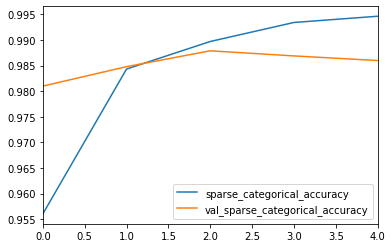

In [195]:
#option2 : integer instead of one-hot encoded
losses[['sparse_categorical_accuracy','val_sparse_categorical_accuracy']].plot()

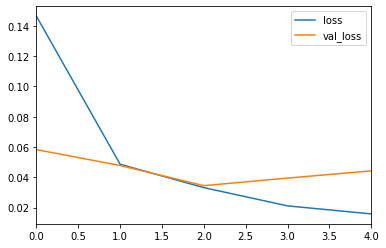

In [196]:
losses[['loss','val_loss']].plot()

In [141]:
# #option 1 : one-hot encoded
# print(model.metrics_names)
# print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.042123886557132936, 0.9875]


In [197]:
#option2 : integer instead of one-hot encoded
print(model.metrics_names)
print(model.evaluate(x_test,y_test,verbose=0))

['loss', 'sparse_categorical_accuracy']
[0.044227901149067474, 0.986]


In [198]:
from sklearn.metrics import classification_report,confusion_matrix

In [199]:
x_test.shape

(10000, 28, 28, 1)

In [200]:
predictions = model.predict_classes(x_test) #(10000, 28, 28, 1)

In [202]:
# #option 1 : one-hot encoded
y_cat_test.shape

(10000, 10)

In [203]:
#option2 : integer instead of one-hot encoded
y_test.shape

(10000,)

In [204]:
# #option 1 : one-hot encoded
y_cat_test[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [205]:
#option2 : integer instead of one-hot encoded
y_test[0]

7

In [206]:
predictions[0]

7

In [207]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [208]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [209]:
confusion_matrix(y_test,predictions)

array([[ 976,    1,    0,    0,    0,    0,    1,    1,    1,    0],
       [   1, 1128,    2,    1,    0,    0,    2,    1,    0,    0],
       [   3,    0, 1022,    0,    2,    0,    0,    4,    1,    0],
       [   1,    0,    3,  994,    0,    4,    0,    5,    2,    1],
       [   0,    0,    0,    0,  977,    0,    0,    0,    0,    5],
       [   2,    0,    0,    5,    0,  880,    2,    0,    1,    2],
       [   9,    2,    0,    0,    2,    2,  943,    0,    0,    0],
       [   0,    2,    9,    0,    0,    0,    0, 1013,    1,    3],
       [   6,    2,    7,    2,    0,    1,    1,    5,  947,    3],
       [   3,    4,    3,    0,    5,    5,    0,    7,    2,  980]])

In [210]:
import seaborn as sns

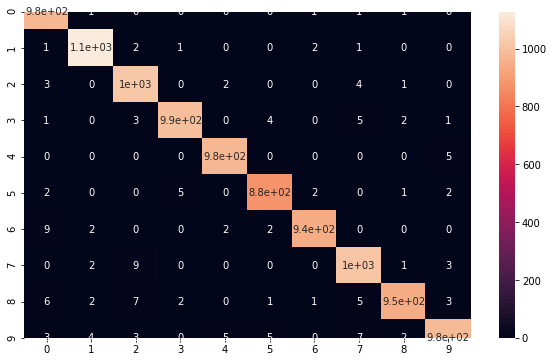

In [211]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751


(10, 0)

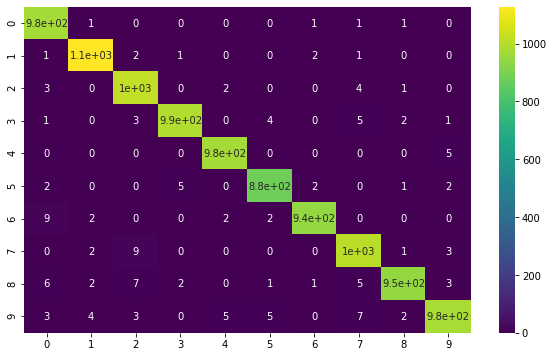

In [212]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap="viridis")
plt.ylim(10, 0) 
# https://github.com/matplotlib/matplotlib/issues/14751


(10, 0)

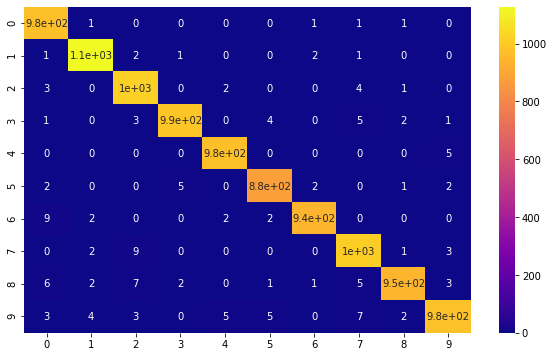

In [213]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap="plasma")
plt.ylim(10, 0) 
# https://github.com/matplotlib/matplotlib/issues/14751


# Predicting a given image

In [214]:
my_number = x_test[0]

In [215]:
my_number.shape

(28, 28, 1)

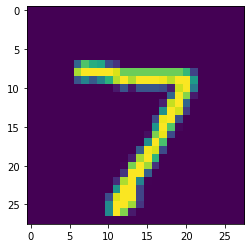

In [216]:
plt.imshow(my_number.reshape(28,28))

In [217]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])

Looks like the CNN performed quite well!

In [218]:
for number in list(np.random.randint(0,9,10)):
    print(number)

5
4
7
4
2
8
1
6
1
7


In [219]:
random_10_digit = list(np.random.randint(0,9,10))
print(random_10_digit)

[6, 7, 6, 2, 3, 3, 2, 8, 2, 7]


In [161]:
##########make ref ##########
# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()

In [220]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

*Image with index 7, x_test[7] is y_test[7] -> 9
(28, 28, 1)
------------------


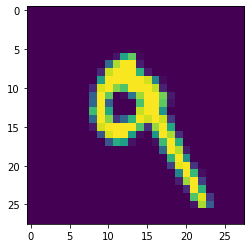

* Predicted number is :  [9]
*Image with index 3, x_test[3] is y_test[3] -> 0
(28, 28, 1)
------------------


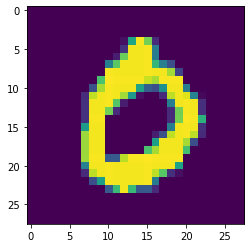

* Predicted number is :  [0]
*Image with index 2, x_test[2] is y_test[2] -> 1
(28, 28, 1)
------------------


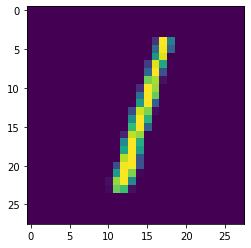

* Predicted number is :  [1]
*Image with index 5, x_test[5] is y_test[5] -> 1
(28, 28, 1)
------------------


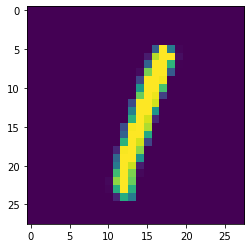

* Predicted number is :  [1]
*Image with index 2, x_test[2] is y_test[2] -> 1
(28, 28, 1)
------------------


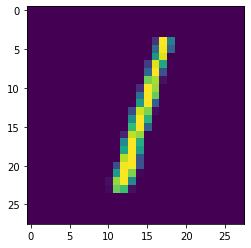

* Predicted number is :  [1]
*Image with index 0, x_test[0] is y_test[0] -> 7
(28, 28, 1)
------------------


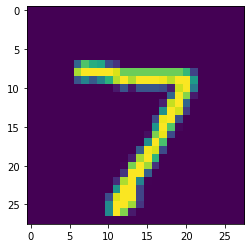

* Predicted number is :  [7]
*Image with index 8, x_test[8] is y_test[8] -> 5
(28, 28, 1)
------------------


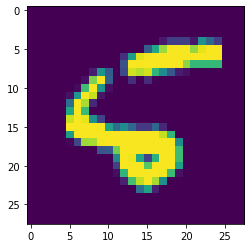

* Predicted number is :  [5]
*Image with index 2, x_test[2] is y_test[2] -> 1
(28, 28, 1)
------------------


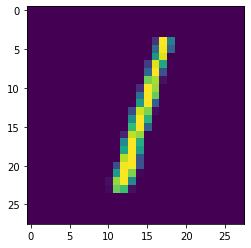

* Predicted number is :  [1]
*Image with index 3, x_test[3] is y_test[3] -> 0
(28, 28, 1)
------------------


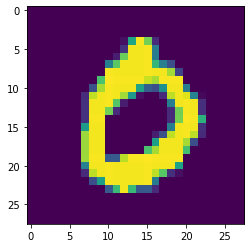

* Predicted number is :  [0]
*Image with index 2, x_test[2] is y_test[2] -> 1
(28, 28, 1)
------------------


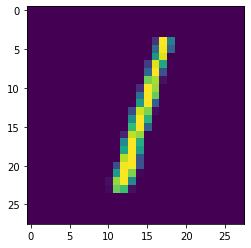

* Predicted number is :  [1]


In [162]:
for number in random_10_digit:
    print(f"*Image with index {number}, x_test[{number}] is y_test[{number}] -> {y_test[number]}")
    
    selected_number = x_test[number] #(28,28,1)
    print(selected_number.shape)
    print("------------------")
    plt.imshow(selected_number.reshape(28,28))
    plt.show() #without this line only last image show up. 
    print("* Predicted number is : ", model.predict_classes(selected_number.reshape(1,28,28,1)))
#     model.predict_classes(my_number[None, :]) #same as above
    print("================================")

In [163]:
####### ref ########
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
# plt.show()

In [164]:
class_names =list(range(10))
class_names = [ "Actual number "+ str(x) for x in class_names]
class_names

['Actual number 0',
 'Actual number 1',
 'Actual number 2',
 'Actual number 3',
 'Actual number 4',
 'Actual number 5',
 'Actual number 6',
 'Actual number 7',
 'Actual number 8',
 'Actual number 9']

In [165]:
for i in range(10):
    print(class_names[y_test[i]])

Actual number 7
Actual number 2
Actual number 1
Actual number 0
Actual number 4
Actual number 1
Actual number 4
Actual number 9
Actual number 5
Actual number 9


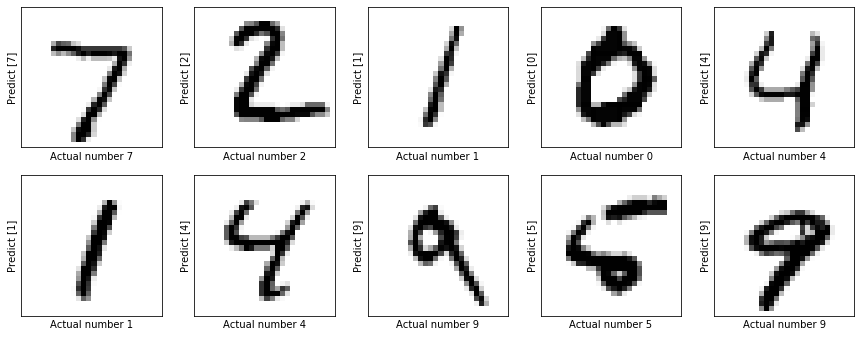

In [166]:
# class_names =list(range(10))
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary) #(28,28,1 -> to imshow : 2d of (28,28))
#     plt.xlabel(class_names[y_test[i]])
    plt.xlabel(class_names[y_test[i]])
    predct_y_label = "Predict "+str(model.predict_classes(x_test[i].reshape(1,28,28,1)))
    plt.ylabel(predct_y_label)    
#     print("* Predicted number is : ", model.predict_classes(x_test[i].reshape(1,28,28,1)))    
plt.show()